***AB Testing**

Data set Ack: https://www.kaggle.com/datasets/adarsh0806/ab-testing-practice

In [10]:
import pandas as pd

df = pd.read_csv("C:\\Users\\brosb\\Documents\\FamilyDocuments\\Chem\\PythonLearning\\WW12_2025\\ab_testing.csv")

In [11]:
df.describe()

,User ID,Page Views,Time Spent
count,5000.000000,5000.000000,5000.000000
mean,14925.159000,7.537600,242.512600
std,2869.153773,4.022465,118.254153
min,10001.000000,1.000000,40.000000
25%,12456.250000,4.000000,137.000000
50%,14858.500000,8.000000,243.000000
75%,17379.750000,11.000000,346.000000
max,19995.000000,14.000000,449.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [13]:
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


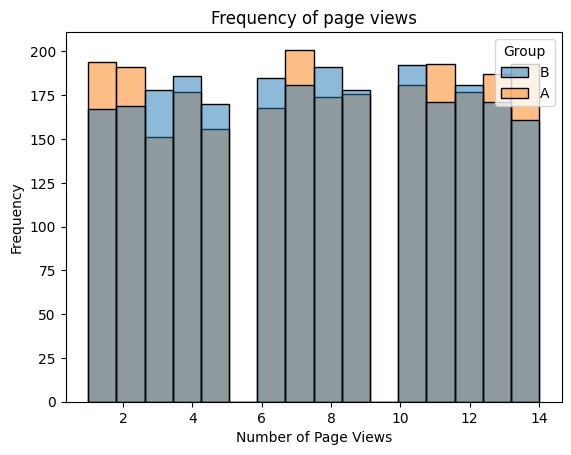

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x="Page Views", data=df, hue="Group")
plt.xlabel("Number of Page Views")
plt.ylabel("Frequency")
plt.title("Frequency of page views")
plt.show()


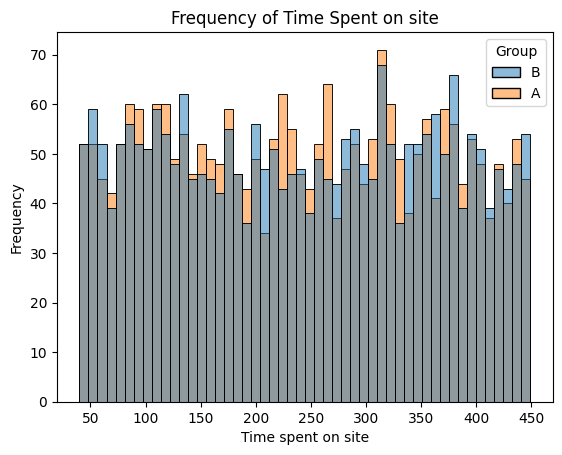

In [15]:
sns.histplot(x="Time Spent", data=df, bins = 50, hue="Group")
plt.xlabel("Time spent on site")
plt.ylabel("Frequency")
plt.title("Frequency of Time Spent on site")
plt.show()

In [19]:
import numpy as np
from scipy import stats

data_GroupA = df.where(df["Group"] == "A")
data_GroupB = df.where(df["Group"] == "B")
data_GroupA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User ID     2519 non-null   float64
 1   Group       2519 non-null   object 
 2   Page Views  2519 non-null   float64
 3   Time Spent  2519 non-null   float64
 4   Conversion  2519 non-null   object 
 5   Device      2519 non-null   object 
 6   Location    2519 non-null   object 
dtypes: float64(3), object(4)
memory usage: 273.6+ KB


In [20]:
data_GroupB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User ID     2481 non-null   float64
 1   Group       2481 non-null   object 
 2   Page Views  2481 non-null   float64
 3   Time Spent  2481 non-null   float64
 4   Conversion  2481 non-null   object 
 5   Device      2481 non-null   object 
 6   Location    2481 non-null   object 
dtypes: float64(3), object(4)
memory usage: 273.6+ KB


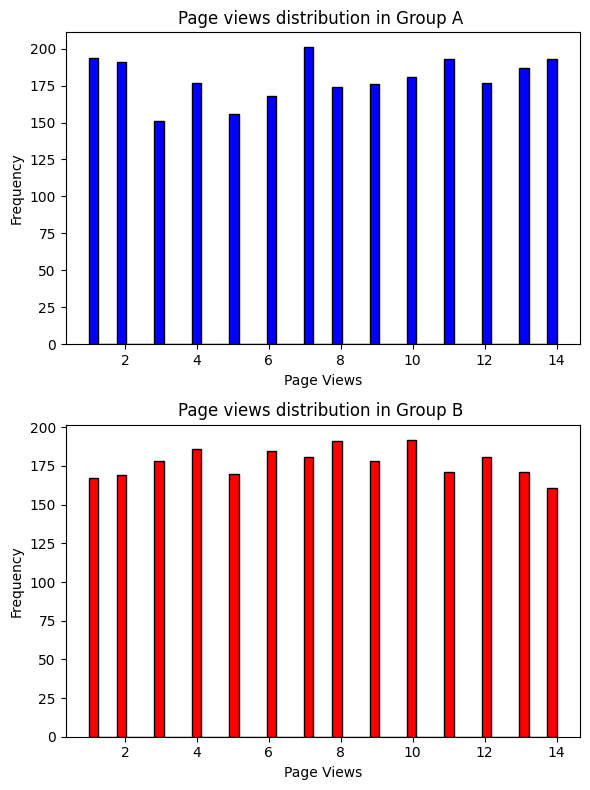

In [22]:
fig, axes = plt.subplots(2,1,figsize=(6,8))

axes[0].hist(data = data_GroupA, x = "Page Views", bins=50, color="blue", edgecolor="black")
axes[0].set_title("Page views distribution in Group A ")
axes[0].set_xlabel("Page Views")
axes[0].set_ylabel("Frequency")

axes[1].hist(data = data_GroupB, x = "Page Views", bins=50, color="Red", edgecolor="black")
axes[1].set_title("Page views distribution in Group B ")
axes[1].set_xlabel("Page Views")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



In [25]:
GroupA_PageViews = data_GroupA["Page Views"].dropna()

GroupA_PageViews


1        9.0
2        2.0
4        1.0
6        5.0
10      14.0
        ... 
4985    12.0
4987    12.0
4991     7.0
4997    11.0
4999    11.0
Name: Page Views, Length: 2519, dtype: float64

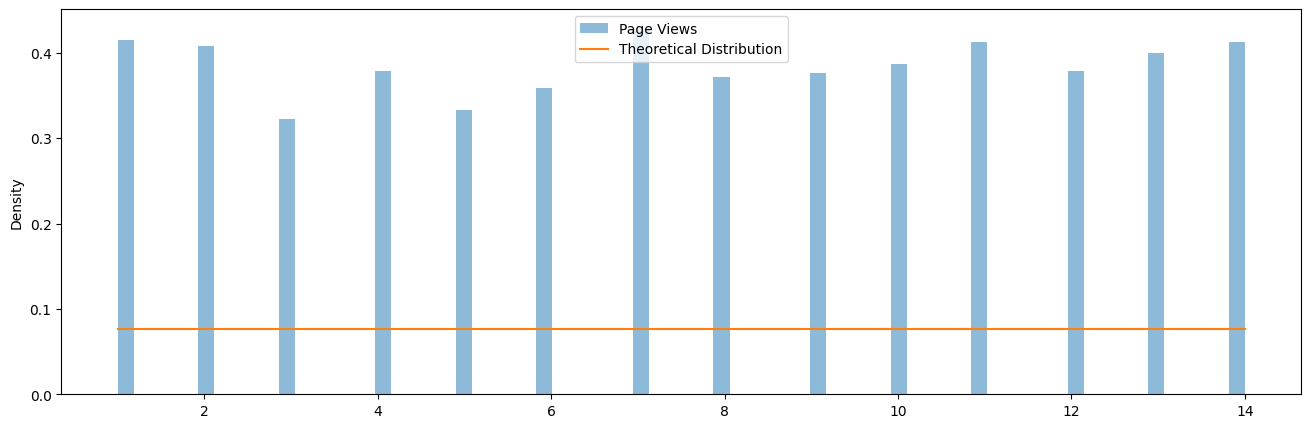

In [26]:
GroupA_PageViews = data_GroupA["Page Views"].dropna()

x_values = np.linspace(min(GroupA_PageViews), max(GroupA_PageViews),100)

distributions = {
    'Normal': stats.norm.pdf(x_values, *stats.norm.fit(GroupA_PageViews)),
    'Exponential': stats.expon.pdf(x_values, *stats.expon.fit(GroupA_PageViews)),
    'Uniform': stats.uniform.pdf(x_values, loc=min(GroupA_PageViews), scale=max(GroupA_PageViews)-min(GroupA_PageViews))
}

distribution_name = 'Uniform'
distribution = distributions[distribution_name]

fix,axes = plt.subplots(1,1,figsize=(16,5))
axes.hist(GroupA_PageViews, bins=70, alpha=0.5, label=GroupA_PageViews.name, density=True)
axes.plot(x_values, distribution, label='Theoretical Distribution')
axes.set_ylabel('Density')
axes.legend()
plt.show()